In [2]:
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima import ARIMA, auto_arima

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly as px
import plotly.graph_objects as go


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

In [5]:
import xgboost as xgb
from xgboost import XGBRegressor

In [6]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_forecast_component

/Users/zeal.v/Desktop/Masterschool_Project-Time_Series_Analysis/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import requests # for downloading files from internet requests.get, requests.post etc 
import py7zr # for 7zip file operations
import zipfile # for zip file operations
import os # os mean operating system / for file operations os.path, os.listdir, os.rename, os.remove etc 
import json # for json operations json.loads, json.dumps etc
import nbformat 

In [8]:
# Download dataset from Kaggle
'''
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("podsyp/time-series-starter-dataset")

print("Path to dataset files:", path)
'''

'\n%pip install kagglehub\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("podsyp/time-series-starter-dataset")\n\nprint("Path to dataset files:", path)\n'

In [9]:
data = pd.read_csv("/Users/zeal.v/Desktop/Masterschool_Project-Time_Series_Analysis/Mock-Data/Month_Value_1.csv")

In [10]:
data.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [11]:
data.info() # Check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [12]:
data.describe().round(2)

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,64.00,64.00,64.00,64.00
mean,32360452.26,19197.38,1695.06,28690829.62
std,11641498.54,6591.29,296.84,1057190.52
min,14021479.61,8314.00,1110.58,27406473.00
25%,22426546.79,15065.50,1499.14,27828571.00
50%,32090875.10,18368.00,1654.40,28197847.00
75%,39929985.09,22856.25,1916.40,29878525.00
max,58756473.66,38069.00,2559.33,30024676.00


In [13]:
data.isnull().sum() # Check for missing values

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

<Axes: xlabel='Revenue', ylabel='Count'>

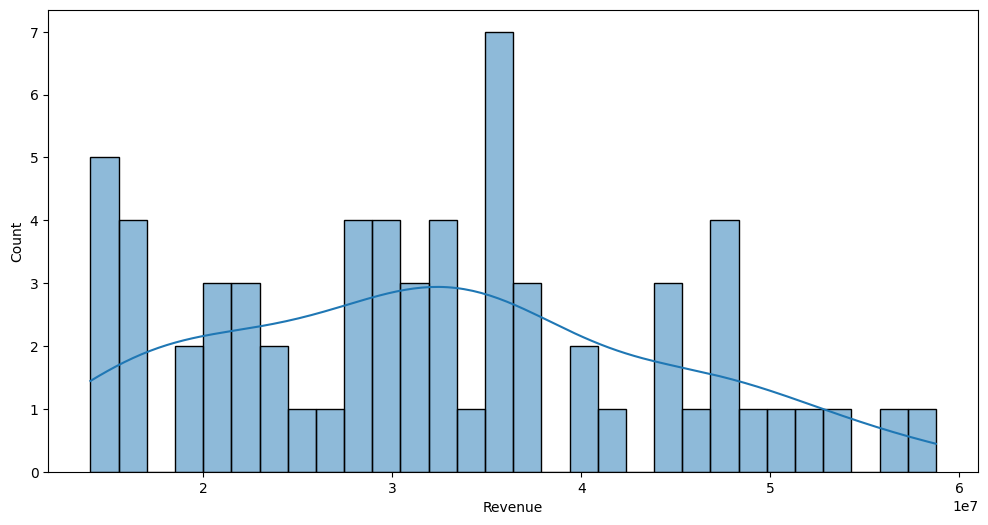

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Revenue'], bins=30, kde=True)

In [53]:
fig = go.Figure(data=go.Histogram(x=data['Revenue'], nbinsx=30))
fig.update_layout(bargap=0.1)
fig.show()

<Axes: ylabel='Sales_quantity'>

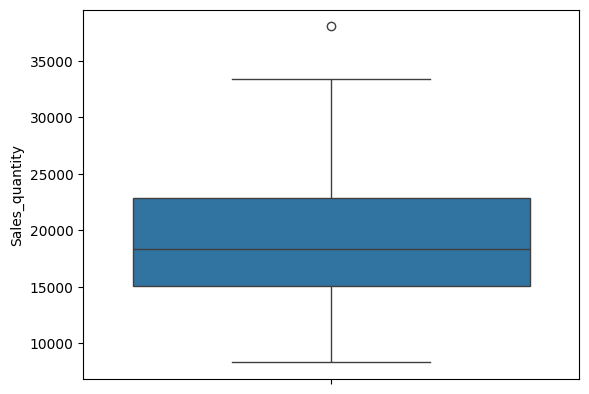

In [45]:
sns.boxplot(data['Sales_quantity'])

In [29]:
fig = go.Figure(data=[go.Box(y=data['Sales_quantity'], name='Sales Quantity')])
fig.update_layout(title='Sales Quantity Distribution', yaxis_title='Sales Quantity')
fig.show()

In [15]:
fig = go.Figure(data=[go.Histogram(x=data['Revenue'], nbinsx=20)])
fig.update_layout(title='Revenue Distribution', xaxis_title='Revenue', yaxis_title='Count', bargap=0.1)
fig.show()

In [57]:
# convert the date column to datetime
data['Period'] = pd.to_datetime(data['Period'])

# set the date column as the index
data.set_index('Period', inplace=True)

data.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0
